In [1]:
import re
import os
import operator import itemgetter
import pandas as pd
from transformers import pipeline
import matplotlib.pyplot as plt
import seaborn as sns

/home/coder/.local/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-05-29 15:16:31.259089: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## clean up txt file

In [2]:
file = open(os.path.join("data", "civil_war_diary_1864.txt"), 'r')
file = file.read()
print(file)

The Project Gutenberg EBook of Personal Recollections and Civil War Diary,
1864, by Lemuel Abijah Abbott

This eBook is for the use of anyone anywhere in the United States and most
other parts of the world at no cost and with almost no restrictions
whatsoever.  You may copy it, give it away or re-use it under the terms of
the Project Gutenberg License included with this eBook or online at
www.gutenberg.org.  If you are not located in the United States, you'll have
to check the laws of the country where you are located before using this ebook.

Title: Personal Recollections and Civil War Diary, 1864

Author: Lemuel Abijah Abbott

Release Date: November 12, 2014 [EBook #47332]

Language: English


*** START OF THIS PROJECT GUTENBERG EBOOK RECOLLECTIONS, CIVIL WAR DIARY, 1864 ***




Produced by Julia Neufeld and The Online Distributed
Proofreading Team at http://www.pgdp.net (This file was
produced from images generously made available by The
Internet Archive)





Transcriber's note:

T

In [3]:
import re
# dates = re.compile(r'\w*[D][A][Y],\s\w{3}[.]\s\d{1,2}[,|.]\s\d{4}')
dates = re.compile(r'\s\w{1,6}DAY,\s\w{3,5}[.]?\s\d{1,2}[,|.]\s1864[.]\n')
dates = dates.findall(file)
dates
# dates = dates[2:-4]

[' FRIDAY, Jan. 1, 1864.\n',
 ' SATURDAY, Jan. 2, 1864.\n',
 ' SUNDAY, Jan. 3, 1864.\n',
 ' MONDAY, Jan. 4, 1864.\n',
 ' TUESDAY, Jan. 5. 1864.\n',
 ' WEDNESDAY, Jan. 6, 1864.\n',
 ' THURSDAY, Jan. 7, 1864.\n',
 ' FRIDAY, Jan. 8. 1864.\n',
 ' SATURDAY, Jan. 9, 1864.\n',
 ' SUNDAY, Jan. 10, 1864.\n',
 ' MONDAY, Jan. 11, 1864.\n',
 ' TUESDAY, Jan. 12, 1864.\n',
 ' WEDNESDAY, Jan. 13, 1864.\n',
 ' THURSDAY, Jan. 14, 1864.\n',
 ' FRIDAY, Jan. 15, 1864.\n',
 ' SATURDAY, Jan. 16, 1864.\n',
 ' SUNDAY, Jan. 17, 1864.\n',
 ' MONDAY, Jan. 18, 1864.\n',
 ' TUESDAY, Jan. 19, 1864.\n',
 ' WEDNESDAY, Jan. 20, 1864.\n',
 ' THURSDAY, Jan. 21, 1864.\n',
 ' FRIDAY, Jan. 22, 1864.\n',
 ' SATURDAY, Jan. 23, 1864.\n',
 ' SUNDAY, Jan. 24, 1864.\n',
 ' MONDAY, Jan. 25, 1864.\n',
 ' TUESDAY, Jan. 26, 1864.\n',
 ' WEDNESDAY, Jan. 27, 1864.\n',
 ' THURSDAY, Jan. 28, 1864.\n',
 ' FRIDAY, Jan. 29, 1864.\n',
 ' SATURDAY, Jan. 30, 1864.\n',
 ' SUNDAY, Jan. 31, 1864.\n',
 ' MONDAY, Feb. 1, 1864.\n',
 ' TUESDAY, Feb.

In [4]:
dates[0]

' FRIDAY, Jan. 1, 1864.\n'

In [5]:
dates_clean = []
for i in range(len(dates)):
    current_date = dates[i]
    current_date = current_date.replace("\n", "")
    current_date = current_date.replace(r'$\.', '')
    current_date = current_date.replace(r'^\s', '')

    current_date = re.sub("Jan", "-1-", current_date)
    current_date = re.sub("Feb", "-1-", current_date)
    current_date = re.sub("March", "-1-", current_date)
    current_date = re.sub("April", "-1-", current_date)
    current_date = re.sub("May", "-1-", current_date)
    current_date = re.sub("June", "-1-", current_date)
    current_date = re.sub("July", "-1-", current_date)
    current_date = re.sub("May", "-1-", current_date)
    current_date = re.sub("Aug", "-1-", current_date)

    dates_clean.append(current_date)
dates_clean

[' FRIDAY, Jan. 1, 1864.',
 ' SATURDAY, Jan. 2, 1864.',
 ' SUNDAY, Jan. 3, 1864.',
 ' MONDAY, Jan. 4, 1864.',
 ' TUESDAY, Jan. 5. 1864.',
 ' WEDNESDAY, Jan. 6, 1864.',
 ' THURSDAY, Jan. 7, 1864.',
 ' FRIDAY, Jan. 8. 1864.',
 ' SATURDAY, Jan. 9, 1864.',
 ' SUNDAY, Jan. 10, 1864.',
 ' MONDAY, Jan. 11, 1864.',
 ' TUESDAY, Jan. 12, 1864.',
 ' WEDNESDAY, Jan. 13, 1864.',
 ' THURSDAY, Jan. 14, 1864.',
 ' FRIDAY, Jan. 15, 1864.',
 ' SATURDAY, Jan. 16, 1864.',
 ' SUNDAY, Jan. 17, 1864.',
 ' MONDAY, Jan. 18, 1864.',
 ' TUESDAY, Jan. 19, 1864.',
 ' WEDNESDAY, Jan. 20, 1864.',
 ' THURSDAY, Jan. 21, 1864.',
 ' FRIDAY, Jan. 22, 1864.',
 ' SATURDAY, Jan. 23, 1864.',
 ' SUNDAY, Jan. 24, 1864.',
 ' MONDAY, Jan. 25, 1864.',
 ' TUESDAY, Jan. 26, 1864.',
 ' WEDNESDAY, Jan. 27, 1864.',
 ' THURSDAY, Jan. 28, 1864.',
 ' FRIDAY, Jan. 29, 1864.',
 ' SATURDAY, Jan. 30, 1864.',
 ' SUNDAY, Jan. 31, 1864.',
 ' MONDAY, Feb. 1, 1864.',
 ' TUESDAY, Feb. 2, 1864.',
 ' WEDNESDAY, Feb. 3, 1864.',
 ' THURSDAY, Feb. 4, 1

In [ ]:
#test
dates_clean = []
for i in range(len(dates)):
    current_date = dates[i]
    current_date = current_date.replace("\n", "")
    current_date = re.sub(r'\t\w+DAY(.|,)\s', '', current_date)
    current_date = re.sub(r'(.|,)\s', "", current_date)

    

    dates_clean.append(current_date)
dates_clean

In [6]:
len(dates)

366

In [7]:
entries = re.compile(r'((?<=1864[.]\n{2})(.*\n)+?(?=\n{2}))')
# entries = re.compile(r'((?<=1864[.]\n{3})(.*\n)+?(?=\n{2}))')
entries = entries.findall(file)

In [ ]:
first_entry = entries[0][0]
first_entry.replace("\n", " ")

In [8]:
len(entries)

366

In [9]:
entries_clean = []
for i in range(len(entries)):
    current_entry = entries[i][0]
    current_entry = current_entry.replace("\n", " ")
    entries_clean.append(current_entry)
entries_clean[0]

'Although attached to Company B, Tenth Regiment Vermont Volunteer Infantry, (Capt. Edwin Dillingham\'s of Waterbury, Vt.), Lieut. Ezra Stetson commanding, I am Second Lieutenant of Company D (Capt. Samuel Darrah\'s of Burlington, Vt.) of the same regiment, having been promoted from First Sergeant of Company B last spring.  All are wishing me a "Happy New Year"! God grant that I may have one. I was awakened long before daylight by the band serenading the birth of the New Year. Lieut. G. W. Burnell took his departure early this morning for Washington, D. C.; he has been promoted Captain of U. S. Colored Troops and is about to take up other duties in Baltimore, Md. It was quite pleasant early in the day but it is very muddy under foot; had a grand New Year\'s dinner. There has been a very cold wind this afternoon. This evening it is clear and intensely cold. Will Clark has made me a short call; am feeling very well but studying hard. '

In [10]:
len(entries_clean)


366

## to pandas

In [11]:
df1 = pd.DataFrame(dates_clean, columns=["date"])
df2 = pd.DataFrame(entries_clean, columns=["entry"])

In [12]:
df1.head()

,date
0,"FRIDAY, Jan. 1, 1864."
1,"SATURDAY, Jan. 2, 1864."
2,"SUNDAY, Jan. 3, 1864."
3,"MONDAY, Jan. 4, 1864."
4,"TUESDAY, Jan. 5. 1864."


In [13]:
df = pd.concat([df1, df2], axis=1)

In [14]:
df.head()

,date,entry
0,"FRIDAY, Jan. 1, 1864.","Although attached to Company B, Tenth Regiment..."
1,"SATURDAY, Jan. 2, 1864.",Another day of the new year has passed but a v...
2,"SUNDAY, Jan. 3, 1864.","Quite a comfortable day; no snow yet, but it l..."
3,"MONDAY, Jan. 4, 1864.","It has snowed nearly all day, but not very har..."
4,"TUESDAY, Jan. 5. 1864.","It has been a beautiful day, but the wind is b..."


In [15]:
df.to_csv(os.path.join("out", "dates&entries.csv"))

## Analyze

In [16]:
classifier = pipeline(task="sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
All model checkpoint layers were used when initializing TFDistilBertForSequenceClassification.

All the layers of TFDistilBertForSequenceClassification were initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


In [17]:
from operator import itemgetter

In [103]:
classifier(entries_clean[0])


[{'label': 'NEGATIVE', 'score': 0.5594527125358582}]

In [46]:
sentiments = []
for entry in entries_clean:
    if len(entry) < 1500:
        output = classifier(entry)
        sentiments.append(output)

In [75]:
len(sentiments)

124

In [61]:
test1 = [dict for sublist in sentiments for dict in sublist]
#test2 = [dict for sublist in test1 for dict in sublist]
test_sort = sorted(test1, key=itemgetter('score'), reverse=True)
test_sort[0]

{'label': 'POSITIVE', 'score': 0.9997872710227966}

In [18]:
sentiments = []
for entry in entries_clean:
    if len(entry) < 1500:
        output = classifier(entry)
        sentiments.append(output)
    else:
        entry_chunks = re.findall('.{1,1500}', entry)
        sentiment_chunks = []
        for chunk in entry_chunks:
            output = classifier(chunk)
            sentiment_chunks.append(output)
        #largest_score_label = sorted(sentiment_chunks)
        sentiment_chunks = [dict for sublist in sentiment_chunks for dict in sublist]
        sentiment_chunks_sorted = sorted(sentiment_chunks, key=itemgetter('score'), reverse=True)
        #clearest_sentiment = sentiment_chunks_sorted[0]
        clearest_sentiment = [sentiment_chunks_sorted[0]]
        sentiments.append(clearest_sentiment)


In [109]:
sentiments[-3:]

[[{'label': 'NEGATIVE', 'score': 0.997612476348877}],
 [{'label': 'NEGATIVE', 'score': 0.9994950294494629}],
 [{'label': 'POSITIVE', 'score': 0.9787585735321045}]]

In [19]:
# variable "results" is a list of list of dicts. It must be flattened into a list of dict to create pandas dataframe.
results = [dict for sublist in sentiments for dict in sublist]
results[250:]

[{'label': 'POSITIVE', 'score': 0.9995787739753723},
 {'label': 'POSITIVE', 'score': 0.9907459020614624},
 {'label': 'POSITIVE', 'score': 0.999305248260498},
 {'label': 'NEGATIVE', 'score': 0.9908428192138672},
 {'label': 'NEGATIVE', 'score': 0.9832549095153809},
 {'label': 'POSITIVE', 'score': 0.9995725750923157},
 {'label': 'NEGATIVE', 'score': 0.9937174320220947},
 {'label': 'NEGATIVE', 'score': 0.9945071339607239},
 {'label': 'NEGATIVE', 'score': 0.9347981214523315},
 {'label': 'NEGATIVE', 'score': 0.993006706237793},
 {'label': 'POSITIVE', 'score': 0.9948573112487793},
 {'label': 'NEGATIVE', 'score': 0.9521248936653137},
 {'label': 'POSITIVE', 'score': 0.999652624130249},
 {'label': 'POSITIVE', 'score': 0.9358645677566528},
 {'label': 'NEGATIVE', 'score': 0.9983819723129272},
 {'label': 'NEGATIVE', 'score': 0.9727672934532166},
 {'label': 'POSITIVE', 'score': 0.9567588567733765},
 {'label': 'NEGATIVE', 'score': 0.9752354025840759},
 {'label': 'NEGATIVE', 'score': 0.980089902877807

In [20]:
df3 = pd.DataFrame.from_records(results)

In [22]:
len(results)

366

In [21]:
df3.head()

,label,score
0,NEGATIVE,0.559453
1,POSITIVE,0.965554
2,POSITIVE,0.968002
3,NEGATIVE,0.703292
4,POSITIVE,0.957086


In [23]:
df3.to_csv(os.path.join("out", "label&score.csv"))

In [25]:
df = pd.concat([df, df3], axis=1)

In [26]:
df.head()

,date,entry,label,score
0,"FRIDAY, Jan. 1, 1864.","Although attached to Company B, Tenth Regiment...",NEGATIVE,0.559453
1,"SATURDAY, Jan. 2, 1864.",Another day of the new year has passed but a v...,POSITIVE,0.965554
2,"SUNDAY, Jan. 3, 1864.","Quite a comfortable day; no snow yet, but it l...",POSITIVE,0.968002
3,"MONDAY, Jan. 4, 1864.","It has snowed nearly all day, but not very har...",NEGATIVE,0.703292
4,"TUESDAY, Jan. 5. 1864.","It has been a beautiful day, but the wind is b...",POSITIVE,0.957086


In [27]:
df.to_csv(os.path.join("out", "results.csv"))

In [182]:
months = ["January"]*31 + ["February"]*29 + ["March"]*31 + ["April"]*30 + ["May"]*31 + ["June"]*30 + ["July"]*31 + ["August"]*31 + ["September"]*30 + ["October"]*31 + ["November"]*30 + ["December"]*31

In [183]:
df['month'] = months

In [184]:
df.head()

,date,entry,label,score,month
0,"FRIDAY, Jan. 1, 1864.","Although attached to Company B, Tenth Regiment...",NEGATIVE,0.559453,January
1,"SATURDAY, Jan. 2, 1864.",Another day of the new year has passed but a v...,POSITIVE,0.965554,January
2,"SUNDAY, Jan. 3, 1864.","Quite a comfortable day; no snow yet, but it l...",POSITIVE,0.968002,January
3,"MONDAY, Jan. 4, 1864.","It has snowed nearly all day, but not very har...",NEGATIVE,0.703292,January
4,"TUESDAY, Jan. 5. 1864.","It has been a beautiful day, but the wind is b...",POSITIVE,0.957086,January


In [185]:
df.to_csv(os.path.join("out", "results.csv"))

## review

In [203]:
df_positive = df[df["label"]=="POSITIVE"]

In [204]:
df_positive = df_positive.sort_values(by="score", ascending=False)
df_positive = df_positive.head(5)
df_positive = df_positive["entry"].tolist()
df_positive

["It's a lovely morning; went to Tunbridge with Dr. Jones; fine evening; am to stay at Mr. Isaac Merrill's tonight. ",
 'A truly beautiful day, warm and pleasant with no wind at all; regiment moved to a new camp this morning; most of the line officers remain here yet. The three left Companies, B, G and K contested for the medal Major C. G. Chandler proposed giving last winter, and B, my old Company and the one I have been with all winter, won it. Of course it would! It always honors itself and me; got a letter from home to-night. ',
 "Cool and pleasant this morning. Dr. Jones has gone to Tunbridge; have spent the day with Dr. Bagley's family; shall remain here over night; called on Mrs. Hayward and her daughter, Susan, this evening. ",
 "A beautiful day; have been to church twice. Mr. Bliss preached two excellent sermons. He always preaches well; is a remarkably gifted, brainy, interesting speaker from the pulpit. Dr. Carpenter's funeral was this afternoon from the Congregational Churc

In [ ]:
with open(os.path.join("out", "positive.txt"), 'w') as f:
    for entry in df_positive:
        f.write("%s\n" % entry)

In [211]:
df_negative = df[df["label"]=="NEGATIVE"]

In [214]:
df_negative = df_negative.sort_values(by="score", ascending=False)
df_negative = df_negative.head(5)
entry_negative = df_negative["entry"].tolist()
date_negative = df_negative["date"].tolist()
negative = []
for i in range(5):
    entry = {date_negative[i] : entry_negative[i]}
    negative.append(entry)
negative

[{' MONDAY, Feb. 8, 1864.': "Chilly and cloudy; don't feel very well to-day, nor does anyone else; all stiff and lame; don't wonder at it for we had to march through mud and water ankle deep or more last night from the Rapidan without a rest. The regiments were completely disorganized; officers and men all got lost from their commands and both struggled and straggled into camp as best they could. It was a mob and a disgrace to the Third Corps. "},
 {' SUNDAY, April 3, 1864.': "It has rained nearly all day; mud very deep in camp: more stormy weather the past two weeks than all winter before; most of the officers are building new cabins, the huts occupied by the previous regiment being uninhabitable. It's a dark and dismal camp, and very depressing. "},
 {' MONDAY, Feb. 1, 1864.': "A dull and miserable day, but no rain; have been studying very hard in the second volume of tactics. No one has been in this evening save Lieut. George P. Welch who has notified me I am detailed for picket to-

## visualize

In [180]:
palette = {"NEGATIVE" : "#B2301B", "POSITIVE" : "#4B5BC1"}

<Figure size 640x480 with 0 Axes>

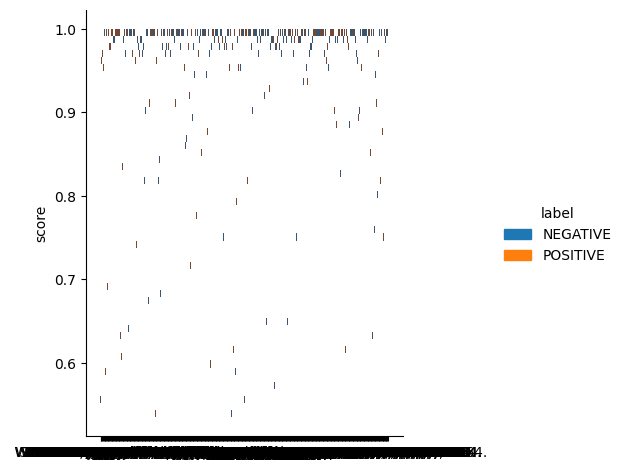

In [139]:
plt.clf()
vis = sns.displot(data = df,
            x = "date",
            y = "score",
            hue = "label")
vis.set(xlabel=None)

<Figure size 640x480 with 0 Axes>

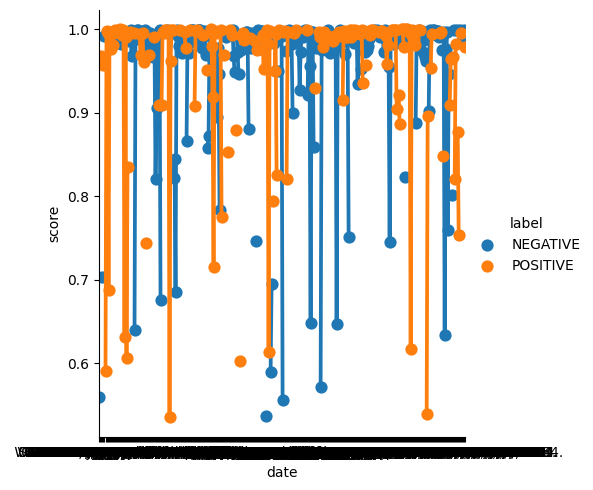

In [140]:
plt.clf()
sns.catplot(data = df,
            x = "date",
            y = "score",
            hue = "label",
            kind = "point")

<Figure size 640x480 with 0 Axes>

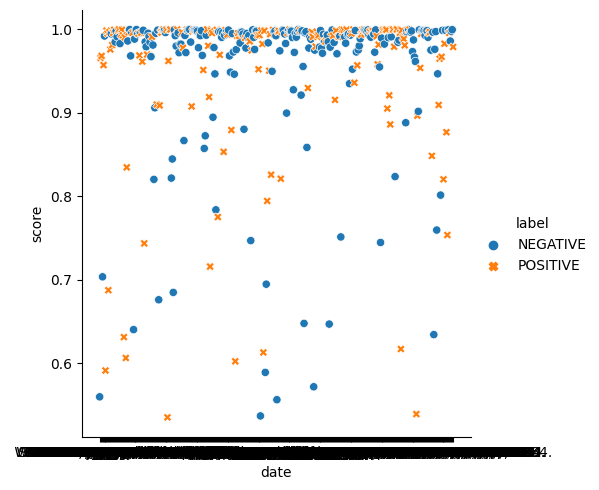

In [144]:
plt.clf()
sns.relplot(data=df, x="date", y="score", hue="label", style="label")

<Figure size 640x480 with 0 Axes>

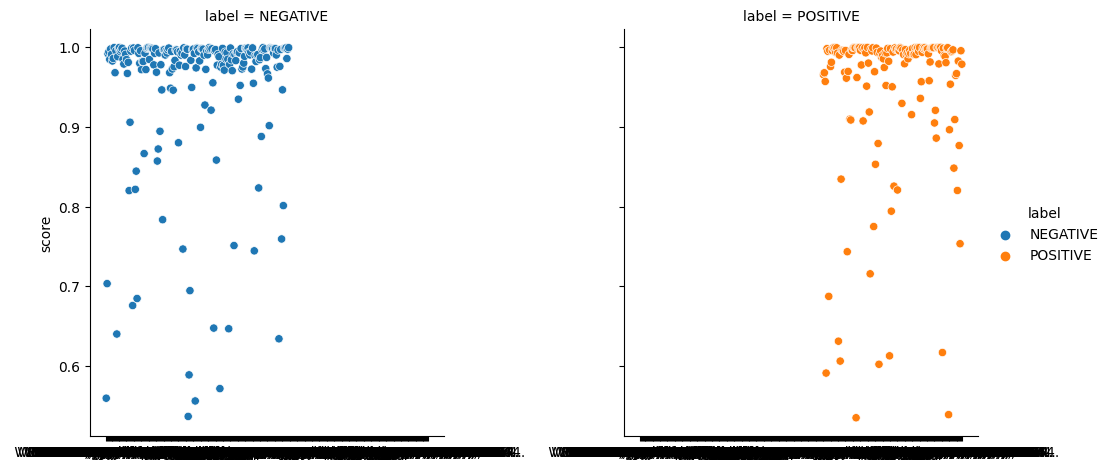

In [146]:
plt.clf()
vis = sns.relplot(data=df, x="date", y="score", hue="label", col="label")
vis.set(xlabel=None)

<Figure size 640x480 with 0 Axes>

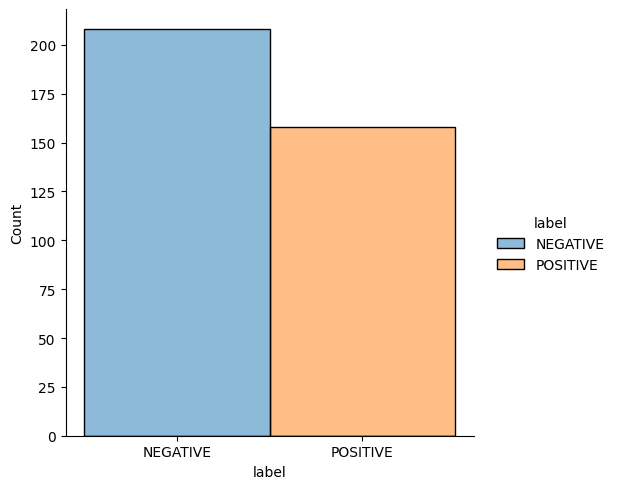

In [147]:
plt.clf()
sns.displot(df, x="label", hue="label")

/home/coder/.local/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 20.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/coder/.local/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


/home/coder/.local/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 35.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/coder/.local/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 35.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 640x480 with 0 Axes>

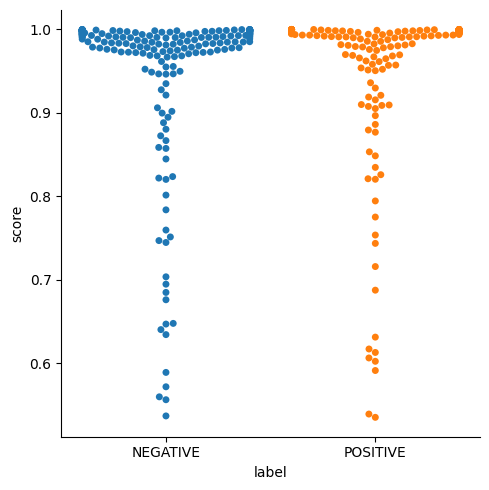

In [149]:
plt.clf()
sns.catplot(data=df, x="label", hue="label", y="score",  kind="swarm")

<Figure size 640x480 with 0 Axes>

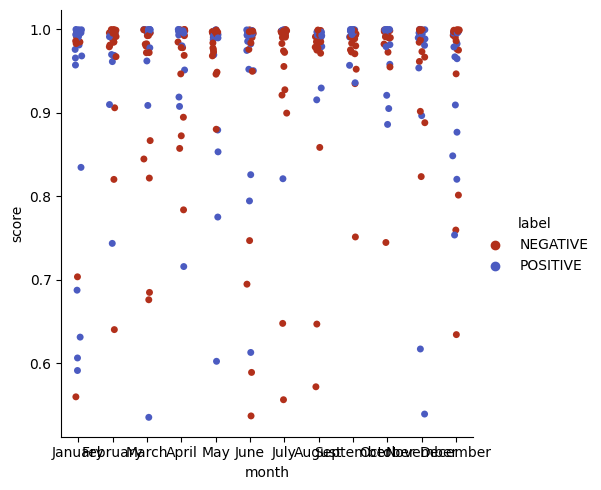

In [190]:
plt.clf()
sns.catplot(data=df, x="month", hue="label", y="score", palette=palette)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

<Figure size 640x480 with 0 Axes>

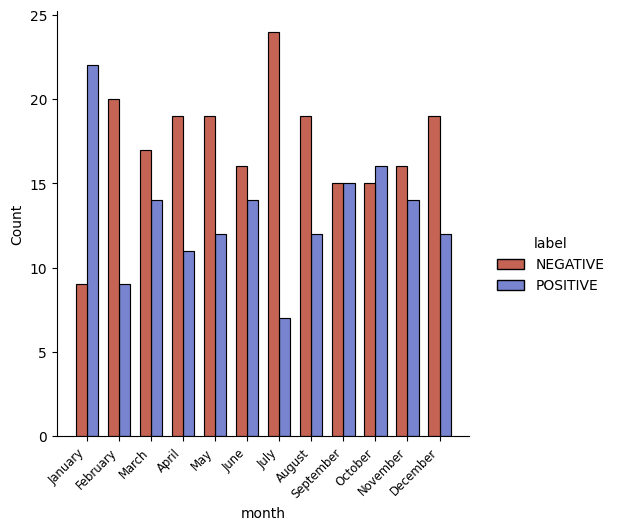

In [186]:
plt.clf()
sns.displot(df, x="month", hue="label", multiple="dodge", shrink=.7, palette=palette)
plt.xticks(rotation=45, 
                horizontalalignment='right',
                fontweight='light',
                fontsize='small')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

<Figure size 640x480 with 0 Axes>

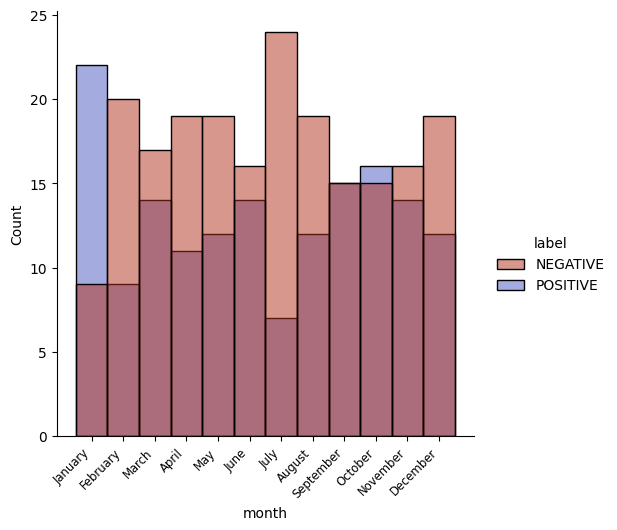

In [188]:
plt.clf()
sns.displot(df, x="month", hue="label", palette=palette)
plt.xticks(rotation=45, 
                horizontalalignment='right',
                fontweight='light',
                fontsize='small')

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

<Figure size 640x480 with 0 Axes>

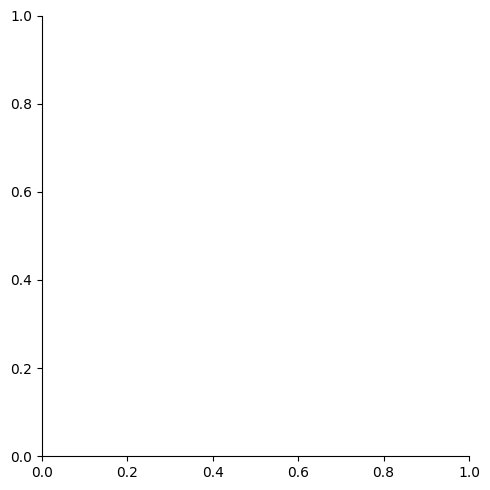

In [189]:
plt.clf()
sns.displot(df, x="month", hue="label", kind="kde", fill=True)

In [ ]:
plt.savefig(os.path.join("out", "vis.png"))

# Notes

In [190]:
testing = "Rained all night and incessantly till 10 oclock a. m. There has been desperate fighting by the Sixth and Second Corps on our left all day at the Bloody Angle where they have held the enemy back as well as tried to take its works, but with great loss of life. This will evidently go down as one of the most bloody and desperate battles of the war. The Tenth Vermont was relieved by some of the Fifth Corps about 3 o'clock p. m., our Division having been ordered further to the left adjoining the Bloody Angle or Slaughter Pen. Just after we had stacked arms under the brow of a slight ridge next the bloody angle, Captain H. R. Steele wandered a little distance in front and almost immediately returned hopping along holding up his foot saying he was shot. I ordered some of the men to take him to the hospital. I am now in command of Company K. The men seem pleased, and I'm sure I am for I like the Company. The men seem sensible, and I know them to be reliable good fighters. I am not sure but what they will win my esteem from Company B, but I never have been fickle; there's room in my heart for all the men of the gallant old Tenth Vermont. They have faith in me and it's mutual. They will never be turned down by me. We are to bivouac on our arms in a dense growth of pine forest with the enemy immediately a short distance in front. _Surely_ this fierce struggle of giant armies can't last more than a day more. Either one or the other will have to yield, and as we have had the best of it here thus far, it will be Lee."

In [191]:
len(testing)

1527

In [ ]:
import re

# getting data of entry : \w*[D][A][Y],\s\w{3}[.]\s\d{1,2}[,|.]\s\d{4}
# (\w*[D][A][Y],\s\w{3}[.]\s\d{1,2}[,|.]\s\d{4}[.])

# Trying to get entry 
# (?<=\d{4}[.])()(?=\n{2})
# (?<=\d{4}[.]\n)(.+)(?=\n{3})
# (?<=1864[.]\n{2})(.*)(?=\n{3})
# (?<=1864[.]\n{2})(?=\n{3})
# (?<=1864[.]\n{2})(.*\n)*[^{3}]
# WORKED : (?<=1864[.]\n{2})(.*\n)+?(?=\n{2})
# entries = re.compile(r'((?<=1864[.]\n{2})(.*\n)+?(?=\n{2}))')


In [104]:
# testing sort dict:
fruits = [{"name":"banana", "value":4}, {"name":"plum", "value":7}, {"name": "pear", "value":2}, {"name":"apple", "value":5}]

In [107]:
sorted_fruits = sorted(fruits, key=itemgetter('value'), reverse=True)
[sorted_fruits[0]]

[{'name': 'plum', 'value': 7}]

In [62]:
test2 = entries_clean[4]
test2

"It has been a beautiful day, but the wind is blowing very chilly to-night; drew clothing for the Company this afternoon; had a very good dress parade considering the quantity of snow and mud under foot. Our school met this evening but we didn't accomplish much. Capt. E. B. Frost, and Dr. W. A. Child and wife dined with us to-day; had a nice time. Herbert George, the band master, has been in this evening relating his experiences during his leave in Vermont. It almost makes me homesick: have got to go on picket early in the morning beyond Culpeper, Va. "

In [74]:
devide_chunks = re.findall('.{1,150}', entries_clean[4])
devide_chunks

['It has been a beautiful day, but the wind is blowing very chilly to-night; drew clothing for the Company this afternoon; had a very good dress parade ',
 "considering the quantity of snow and mud under foot. Our school met this evening but we didn't accomplish much. Capt. E. B. Frost, and Dr. W. A. Child",
 ' and wife dined with us to-day; had a nice time. Herbert George, the band master, has been in this evening relating his experiences during his leave i',
 'n Vermont. It almost makes me homesick: have got to go on picket early in the morning beyond Culpeper, Va. ']

In [128]:
date_test = "	SATURDAY, Jan 2, 1864."
date_test

'\tSATURDAY, Jan 2, 1864.'

In [129]:
date_test = re.sub(r'\t\w+DAY(\.|,)?\s', '', date_test)
date_test

'Jan 2, 1864.'

In [115]:
date_test = re.sub(r'\w+\s\d{2}', '', date_test)
date_test

'Jan 2, 1864.'

In [ ]:
date_test = re.sub(r'\w+\s\d{1}', '', date_test)
date_test

In [130]:
date_test = re.sub(r'(\.|,)\s', "", date_test)
date_test

'Jan 21864.'

In [131]:
date_test = re.sub(r'Jan\.?\s', "-01-", date_test)
date_test

'-01-21864.'

In [132]:
date_test = re.sub("1864", "", date_test)
date_test

'-01-2.'

In [133]:
date_test = re.sub(date_test, "1864" + date_test, date_test)
date_test

'1864-01-2.'

In [134]:
date_test = re.sub(r'\.', "", date_test)
date_test

'1864-01-2'

In [136]:
#date_test = re.sub(r'1864-\n{2}-\n{1}$', r'1864-\n{2}-0\n$', date_test)
date_test = re.sub(r'(?<=1864-\n{2}-).{0}(?=\n{1}$)', "0", date_test)
date_test

'1864-01-2'

In [ ]:
dates_clean = []
for i in range(len(dates)):
    current_date = dates[i]
    current_date = current_date.replace("\n", "")
    current_date = current_date.replace(r'$\.', '')
    current_date = current_date.replace(r'^\s', '')

    current_date = re.sub(r'Jan\.?\s', "-01-", current_date)
    current_date = re.sub(r'Feb\.?\s', "-02-", current_date)
    current_date = re.sub("March", "-03-", current_date)
    current_date = re.sub("April", "-04-", current_date)
    current_date = re.sub("May", "-05-", current_date)
    current_date = re.sub("June", "-06-", current_date)
    current_date = re.sub("July", "-07-", current_date)
    current_date = re.sub(r'Aug\.?\s', "-08-", current_date)
    current_date = re.sub(r'Sept\.?\s', "-09-", current_date)
    current_date = re.sub(r'Oct\.?\s', "-10-", current_date)
    current_date = re.sub(r'Dec\.?\s', "-11-", current_date)

    date_test = re.sub("1864", "", date_test)
    date_test = re.sub(r'\.', "", date_test)

    

    dates_clean.append(current_date)
dates_clean

In [159]:
months = ["January"]*31 + ["February"]*29 + ["March"]*31 + ["April"]*30 + ["May"]*31 + ["June"]*30 + ["July"]*31 + ["August"]*31 + ["September"]*30 + ["Oktober"]*31 + ["November"]*30 + ["December"]*31
months

['January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'January',
 'February',
 'February',
 'February',
 'February',
 'February',
 'February',
 'February',
 'February',
 'February',
 'February',
 'February',
 'February',
 'February',
 'February',
 'February',
 'February',
 'February',
 'February',
 'February',
 'February',
 'February',
 'February',
 'February',
 'February',
 'February',
 'February',
 'February',
 'February',
 'February',
 'March',
 'March',
 'March',
 'March',
 'March',
 'March',
 'March',
 'March',
 'March',
 'March',
 'March',
 'March',
 'March',
 'March',
 'March',
 'March',
 'March',
 'March',
 'March',
 'March',
 'March',
 'March',
 'March',
 'March',
 'March',
 

In [160]:
len(months)

366